In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [72]:
df = pd.read_csv("Excels\\boston_housing.csv")
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [73]:
df.shape

(489, 4)

In [74]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [75]:
df[df['LSTAT']>df['LSTAT'].mean()+3*df['LSTAT'].std()]

,RM,LSTAT,PTRATIO,MEDV
141,5.019,34.41,21.2,302400.0
356,4.906,34.77,20.2,289800.0
357,4.138,37.97,20.2,289800.0
395,4.628,34.37,20.2,375900.0
397,4.519,36.98,20.2,147000.0


In [76]:
df['z-score'] = (df['LSTAT'] - df['LSTAT'].mean())/df['LSTAT'].std()
df.head()

,RM,LSTAT,PTRATIO,MEDV,z-score
0,6.575,4.98,15.3,504000.0,-1.123926
1,6.421,9.14,17.8,453600.0,-0.536520
2,7.185,4.03,17.8,728700.0,-1.258069
3,6.998,2.94,18.7,701400.0,-1.411981
4,7.147,5.33,18.7,760200.0,-1.074505


In [77]:
df[ (df['z-score']>3) | (df['z-score'] < -3 )]

,RM,LSTAT,PTRATIO,MEDV,z-score
141,5.019,34.41,21.2,302400.0,3.031686
356,4.906,34.77,20.2,289800.0,3.082519
357,4.138,37.97,20.2,289800.0,3.534369
395,4.628,34.37,20.2,375900.0,3.026038
397,4.519,36.98,20.2,147000.0,3.394578


In [78]:
df = df[ (df['z-score']<3) & (df['z-score'] > -3 )]
df.head()

,RM,LSTAT,PTRATIO,MEDV,z-score
0,6.575,4.98,15.3,504000.0,-1.123926
1,6.421,9.14,17.8,453600.0,-0.536520
2,7.185,4.03,17.8,728700.0,-1.258069
3,6.998,2.94,18.7,701400.0,-1.411981
4,7.147,5.33,18.7,760200.0,-1.074505


In [79]:
df.drop(['z-score'],axis='columns',inplace=True)

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(['MEDV'],axis='columns')
y = df['MEDV']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [91]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

scores = cross_val_score(LinearRegression(),X,y_train,cv=5)
scores.mean()

0.7348070572833876

In [92]:
model = LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)

0.7418298649017641

In [83]:
y_test_predict = model.predict(X_test)
r2 = r2_score(y_test,y_train_predict)
r2

0.7113173030454638

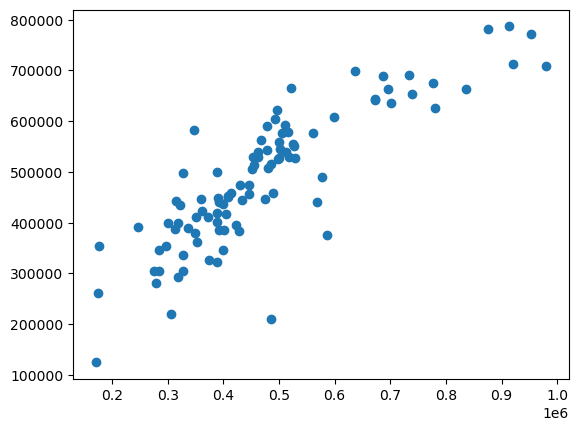

In [84]:
plt.scatter(y_test, y_test_predict)
plt.show()

In [87]:
best_model = {
    'lin_model': {
        'model': LinearRegression(),
        'params': {}
    },
    'log_model': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {'C': [1, 5, 10]}
    }
}


In [88]:
scores = []

for model_name,mp in best_model.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5)
    clf.fit(X,y)
    scores.append({
        'model':model_name,
        "best_score" : clf.best_score_,
        "best_params" : clf.best_params_
    })

df = pd.DataFrame(scores)
df

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,lin_model,0.507612,{}
1,log_model,0.026869,{'C': 10}
